# **Bank Marketing Campaign**

## **Business Problem Understanding**

**Context**  
Jenis produk keuangan yang saat ini digunakan masyarakat sangat bervariasi. Salah satu produk keuangan yang cukup dikenal masyarakat adalah term deposit. Mekanisme term deposit adalah nasabah menyimpan sejumlah uang di bank atau lembaga keuangan, dan uang tersebut hanya dapat ditarik setelah jangka waktu tertentu. Sebagai kompensasinya, nasabah akan diberikan bunga tetap sesuai dengan nominal uang yang disetorkan.

Namun demikian, sebagai badan usaha dengan produk keuangan dan nasabahnya masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan kampanye pemasaran.

Target :

0 : Tidak melakukan term deposit

1 : Melakukan term deposit

**Problem Statement :**

Kampanye pemasaran dengan menghubungi nasabah bisa memakan waktu dan biaya jika perusahaan menargetkan semua nasabah tanpa melakukan penyaringan terlebih dahulu. Perusahaan ingin meningkatkan efisiensi kampanye dengan mengetahui nasabah mana yang berminat untuk melakukan term deposit. 

**Goals :**

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang nasabah berminat untuk melakukan term deposit atau tidak sehingga kampanye pemasaran hanya akan difokuskan kepada nasabah yang berminat untuk melakukan term deposit saja.

Dan juga, perusahaan ingin mengetahui faktor apa saja yang membuat seorang nasabah berminat untuk melakukan term deposit, sehingga mereka dapat membuat kampanye pemasaran yang lebih baik untuk diberikan kepada nasabah potensial (nasabah yang berminat untuk melakukan term deposit) .

**Analytic Approach :**

Kita akan menganalisis data untuk menemukan pola yang membedakan nasabah yang berminat melakukan term deposit atau tidak berminat. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang nasabah akan berminat melakukan term deposit atau tidak berminat.

**Evaluation Metric :**

Karena fokus utama kita adalah nasabah yang berminat melakukan term deposit, maka target yang kita tetapkan adalah sebagai berikut:

Target :

0 : Tidak melakukan term deposit

1 : Melakukan term deposit

Type 1 error : False Positive (nasabah yang aktualnya tidak melakukan term deposit tetapi diprediksi melakukan term deposit)

Konsekuensi: Potensi pengeluaran biaya yang tinggi untuk melakukan kampanye pemasaran dengan telefon yang tidak sebanding dengan hasil akhir

Type 2 error : False Negative (nasabah yang aktualnya melakukan term deposit tetapi diprediksi tidak melakukan term deposit)

Konsekuensi: Kehilangan nasabah yang berpotensi meningkatkan pendapatan perusahaan dari term deposit

Untuk memberikan gambaran konsekuensi secara kuantitatif, maka kita akan coba hitung dampak biaya berdasarkan asumsi berikut :
- Menurut [liveagen.com](https://www.liveagent.com/customer-support-glossary/cost-per-call/) Biaya rata-rata telefon untuk setiap panggilan adalah $2.70 – $5.60.
- menurut [blog.hubspot.com](https://blog.hubspot.com/sales/best-times-to-connect-with-leads-infographic), setidaknya kita harus menelfon sebanyak 6 kali kepada konsumen agar konsumen tersebut tertarik pada produk yang kita tawarkan
- Menurut [investopedia.com](https://www.investopedia.com/terms/t/timedeposit.asp) Term deposit sangat menguntungkan untuk bank. Setiap deposit nasabah bisa digunakan bank untuk meminjamkan uang ke nasabah lain atau menginvestasikan uang dari term deposit kepada sekuritas lain yang dapat memberikan profit lebih tinggi daripada yang dibayarkan oleh nasabah.
- Menurut [bankrate.com](https://www.bankrate.com/banking/cds/cd-rates/) Bunga yang diterima dari term deposit sebesar $1000 selama 1 tahun ada di sekitar 5%
- Menurut [westpac.com](https://www.westpac.com.au/personal-banking/bank-accounts/term-deposit/savings-vs-term-deposit/) sebagian besar term deposit memiliki setoran saldo minimum, mayoritas antara $1,000 - $5,000


Berdasarkan asumsi di atas maka kita dapat coba kuantifikasi konsekuensinya sebagai berikut :
- Pengeluaran biaya --> Untuk setiap panggilan, kita asumsikan biayanya adalah $4 dan kita harus menelfon sebanyak 6x, jadi biaya yang dikeluarkan adalah $24 per nasabah
- Kerugian akibat kehilangan nasabah potensial --> Untuk setiap pelanggan yang melakukan term deposit sebesar $1,000 dalam jangka waktu 1 tahun, kita harus mengembalikan bunga sebesar $50 kepada nasabah. Setelah dikurangi dengan bunga,  apabila kita menggunakan uang tersebut sebagai pinjaman untuk nasabah lain, maka kita akan mendapatkan keuntungan sebesar : 
    - Keuntungan = (Nominal deposit x bunga x periode) / jumlah bulan [sumber](https://manajemen.uma.ac.id/2021/02/2-cara-menghitung-bunga-pinjaman-bank-flat-dan-efektif/)
    - Keuntungan = (950 x 5% x 1) / 12 = **$3,95 perbulan** atau **$47,5 pertahun**

Berdasarkan konsekuensinya, kita merasa bahwa keduanya sama-sama penting untuk diminimalisir, kita akan membuat model yang dapat mengurangi jumlah False Negative dan juga False Positive sehingga metric utama yang akan kita gunakan adalah **F1-score**.

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder, OrdinalEncoder
import category_encoders as ce


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## **Data**


### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| age | Integer | Usia nasabah |
| job | String | Pekerjaan nasabah |
| balance | Integer | Saldo nasabah di rekening |
| housing | String | Apakah nasabah mempunyai pinjaman untuk pembelian rumah? |
| loan | String | Apakah nasabah mempunyai pinjaman pribadi? |
| contact | String | Jenis komunikasi yang digunakan |
| month | String | Bulan terakhir kali melakukan kontak pada tahun ini  |
| campaign | Integer | Jumlah kontak yang dilakukan selama kampanye untuk nasabah ini |
| pdays | Integer | jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya. -1 apabila nasabah tidak dihubungi lagi |
| poutcome | String | Hasil dari kampanye pemasaran sebelumnya |
| deposit | String | Apakah nasabah berlangganan deposito berjangka? |

## **Load Dataset**

In [2]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


## **Data Understanding & Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


- Dataset terdiri dari 7813 baris dan 11 kolom dengan tipe data integer dan object
- Dataset tidak memiliki missing value
- Karena value pada kolom `deposit` (target) masih berupa string, kita akan melakukan encoding dengan mengganti nilai 'yes' menjadi 1 dan 'no' menjadi 0

In [4]:
# Mengubah nilai pada kolom deposit
df['deposit'] = np.where(df['deposit']=='yes', 1, 0)

**Duplicated Data**

In [5]:
df.duplicated().sum()

8

- dataset memiliki data duplikat sehingga duplikat akan di hapus

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(7805, 11)

**Missing Values**

In [8]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

- dataset tidak memiliki missing value

**Descriptive Statistics**

In [9]:
display(df.describe(), df.describe(include='object'))

,age,balance,campaign,pdays,deposit
count,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,51.462268,0.477899
std,11.922833,3090.508938,2.728204,108.115084,0.499543
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,128.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,2.000000,-1.000000,0.000000
75%,49.000000,1685.000000,3.000000,41.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


,job,housing,loan,contact,month,poutcome
count,7805,7805,7805,7805,7805,7805
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1789,4136,6781,5623,1973,5811


- Jumlah nasabah pada dataset adalah 7805
- Saldo nasabah terbanyak adalah $66,653
- Nasabah paling sering dihubungi sebanyak 63x
- Rentang usia nasabah berada pada 18-95 tahun
- Nasabah paling banyak berusia 31 tahun sebanyak 351 orang
- Mayoritas nasabah mempunyai pekerjaan management sebanyak 1789 orang
- Mayoritas nasabah tidak mempunyai pinjaman perumahan dan pinjaman pribadi
- Kontak dengan pelanggan paling banyak dilakukan melalui seluler

In [10]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[no, yes]"
5,contact,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0,0.0,4,"[unknown, other, failure, success]"


## **Simple EDA**

In [11]:
numerical_features = df.drop(columns=['job', 'housing', 'loan', 'contact', 'month', 'poutcome']).describe().columns

In [12]:
from scipy.stats import normaltest

**Numerical Features**

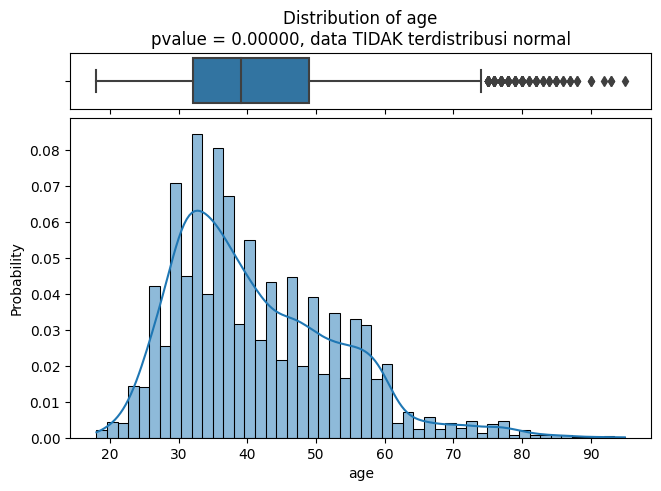

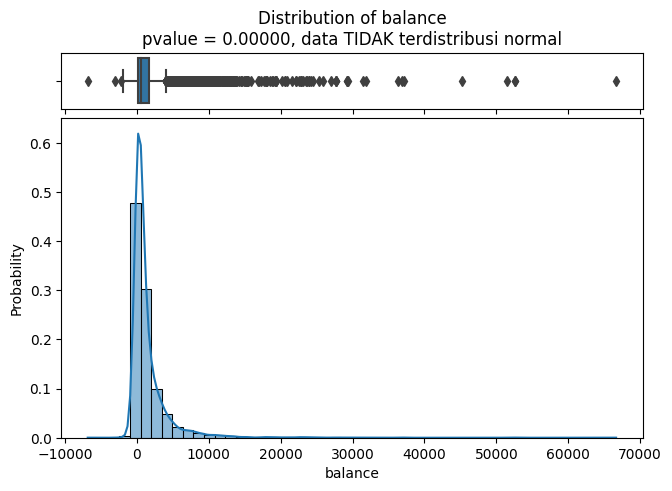

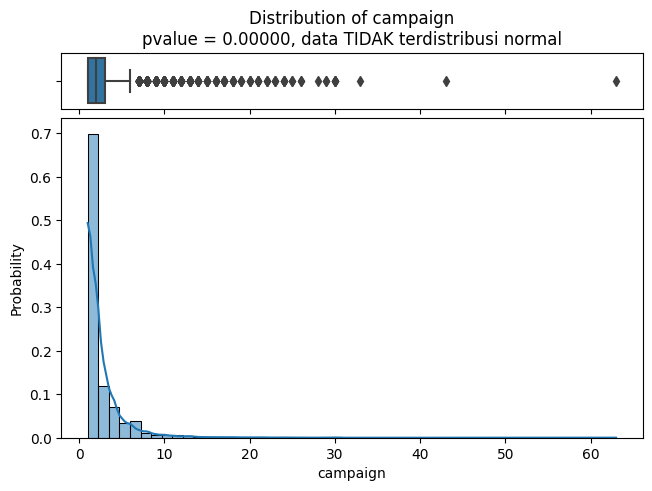

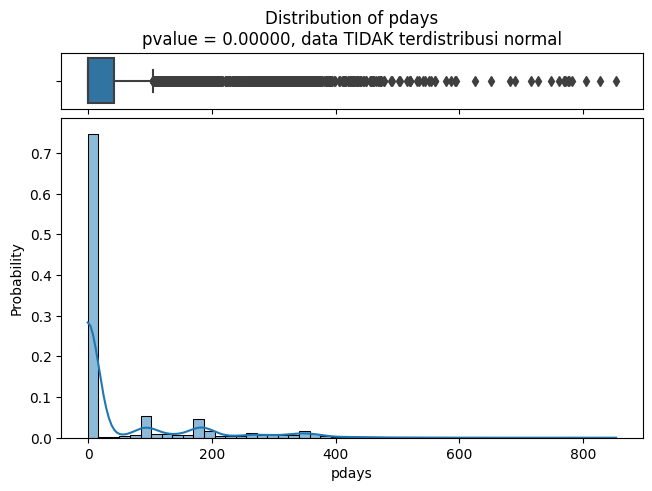

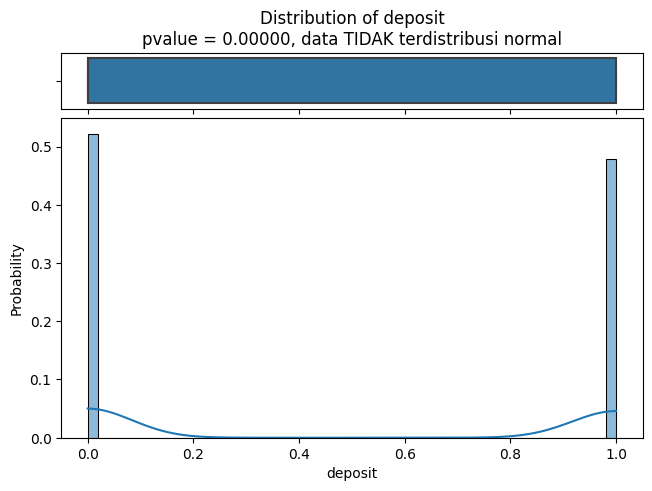

In [13]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

- Dari grafik di atas, kita bisa menarik kesimpulan bahwa data pada kolom numerikal tidak terdistribusi normal

**Categorical Features**

In [14]:
categorical_features = df.describe(include='object').columns

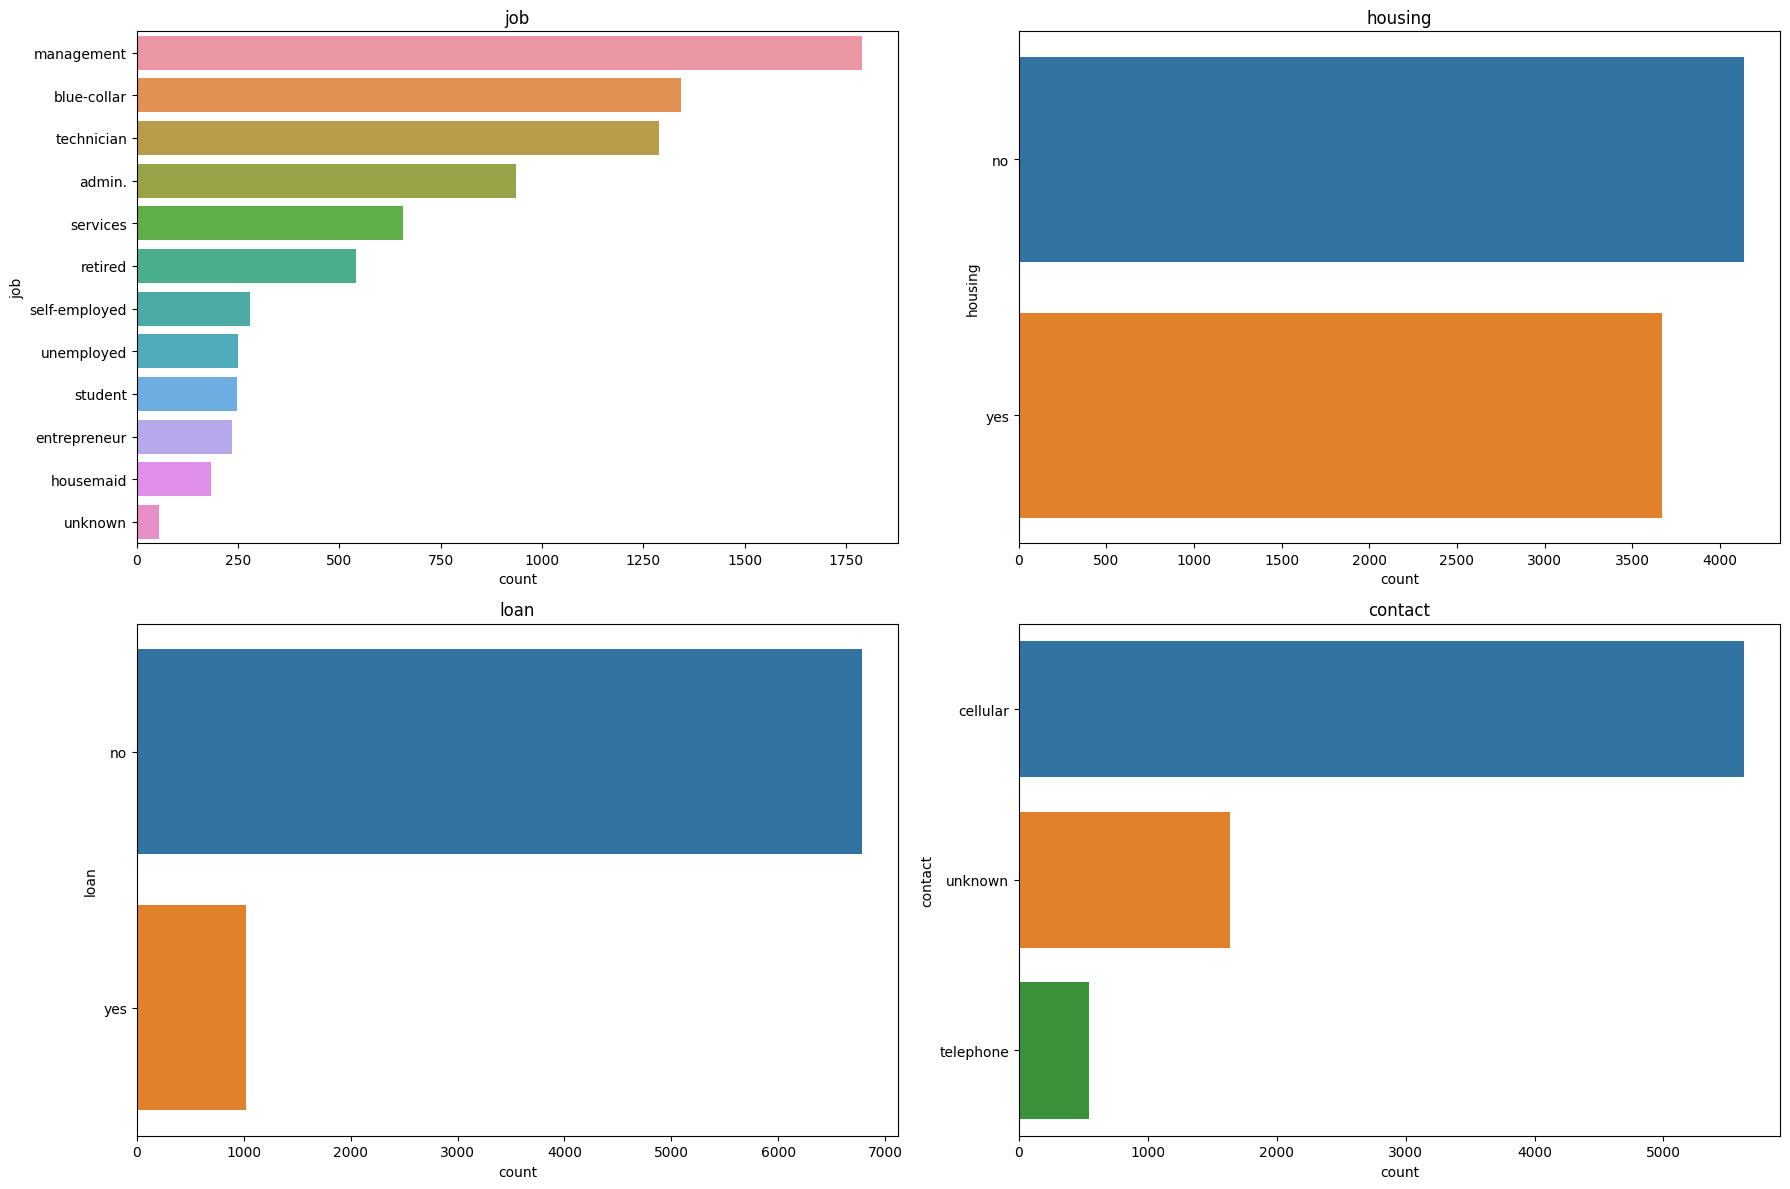

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'{i}',size = 12) 
plt.tight_layout()

plt.show()

Dari grafik di atas, kita bisa menarik kesimpulan bahwa :
- Nasabah dengan pekerjaan Management dan Blue-collar menjadi yang paling banyak di dataset
- Nasabah yang tidak mempunyai pinjaman perumahan pada dataset lebih banyak daripada yang mempunyai pinjaman
- Nasabah yang tidak mempunyai pinjaman pribadi pada dataset lebih banyak daripada yang mempunyai pinjaman
- Nasabah paling banyak dihubungi melalui seluler

## **Data Analysis**

### **Plot of categorical features vs target**

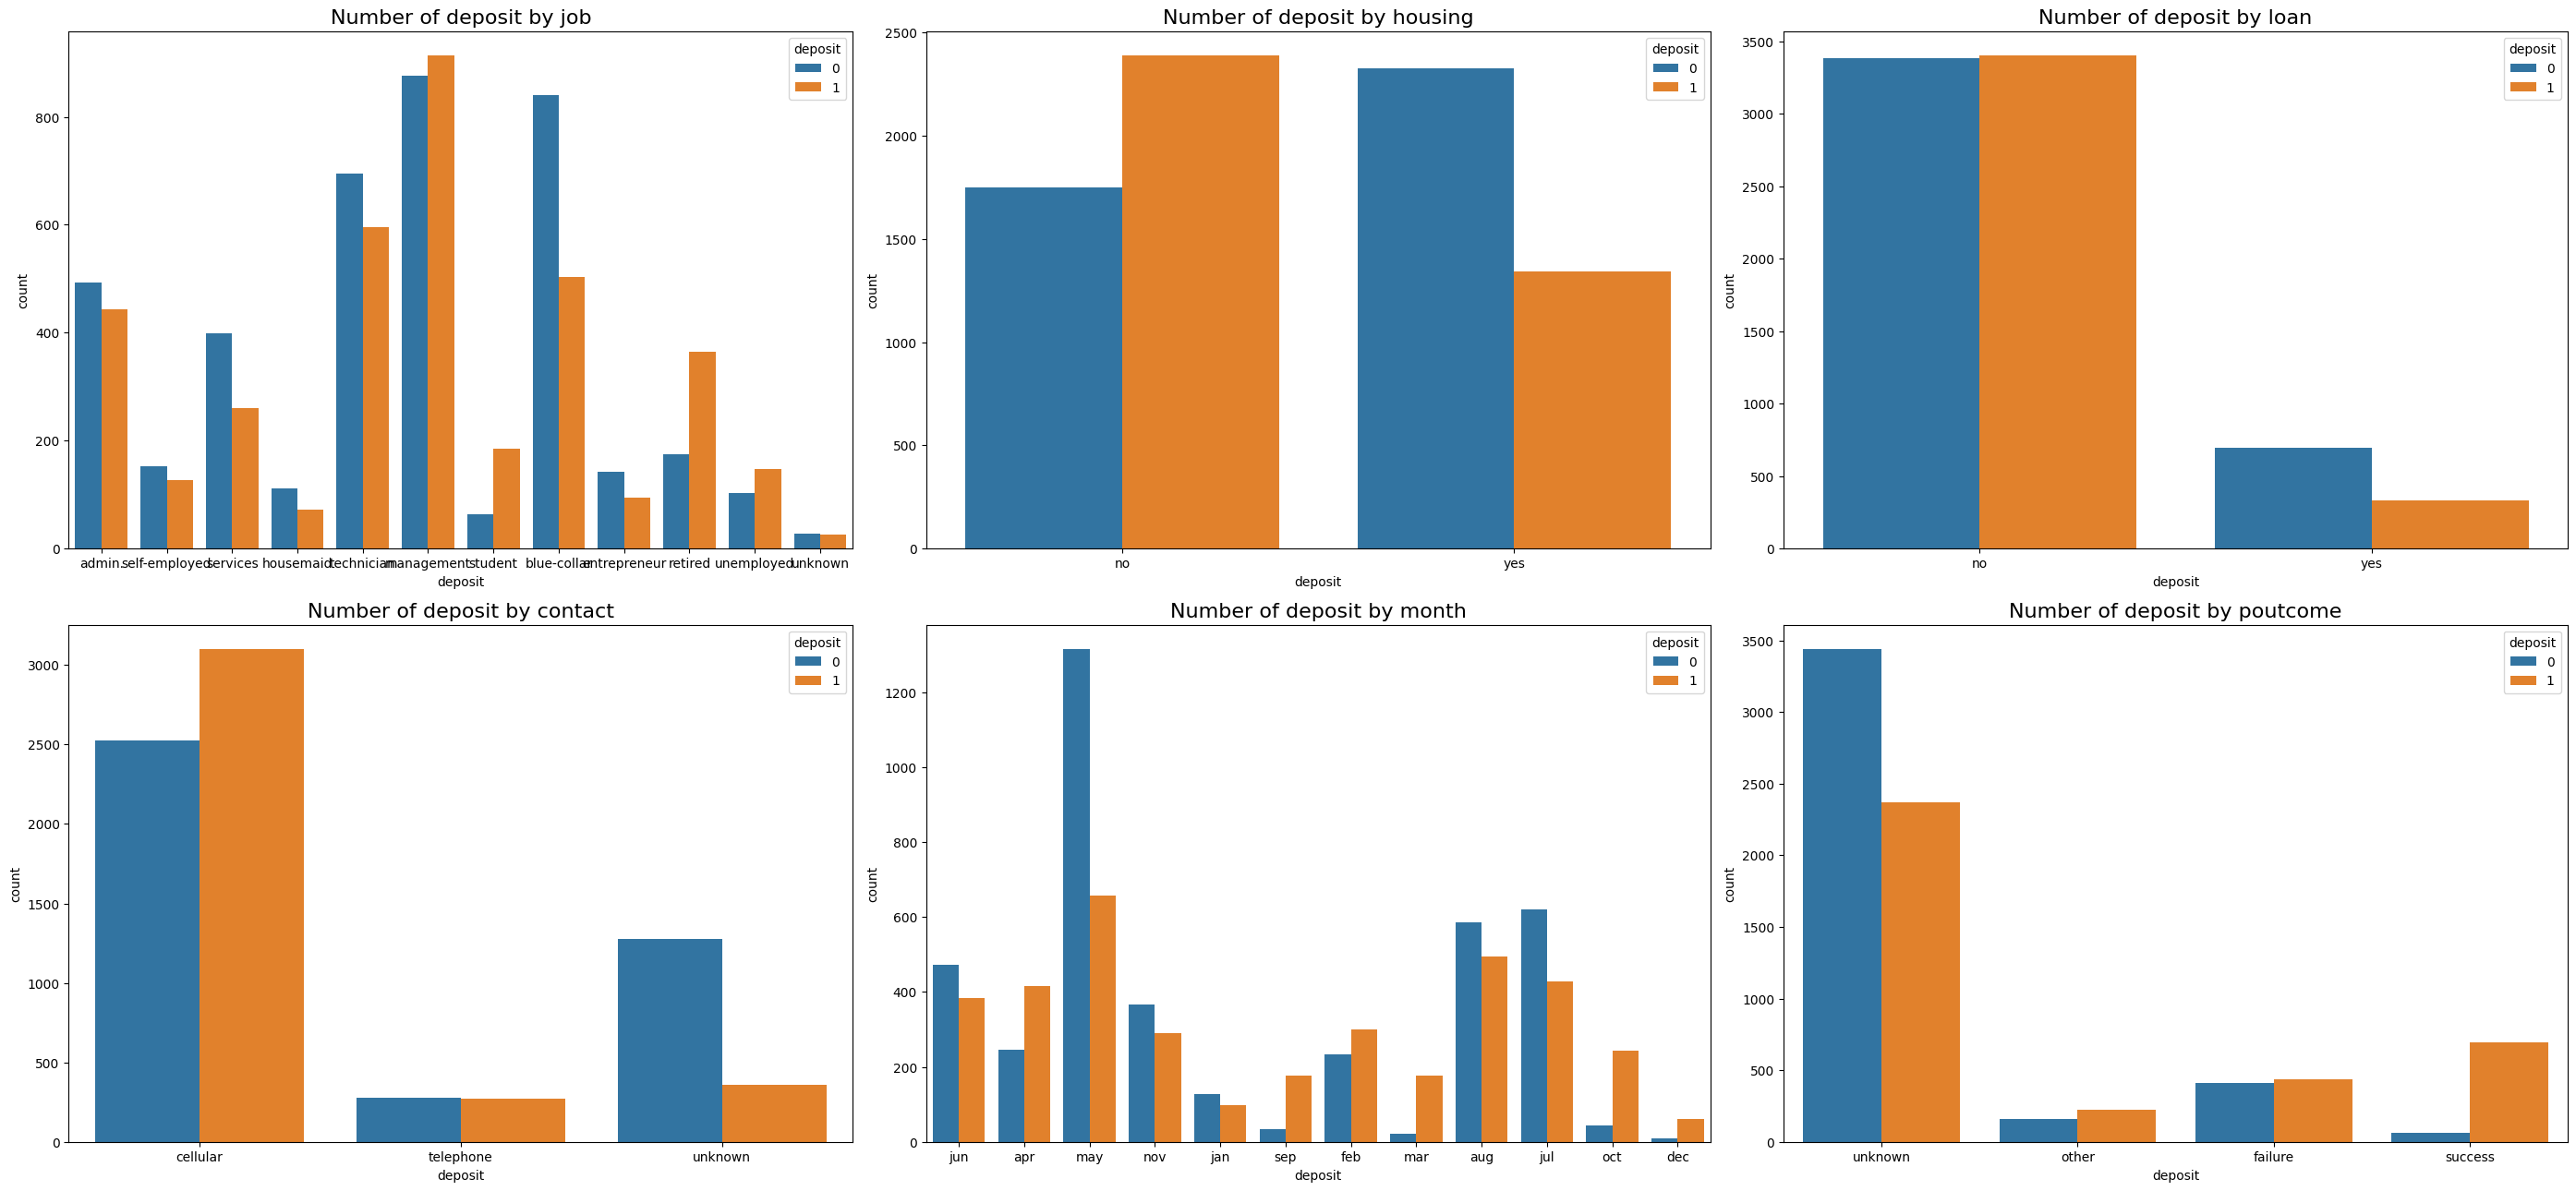

In [18]:
plt.figure(figsize=(28, 19))
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(hue = 'deposit', x = feature, data = df)
    plt.xlabel('deposit')
    plt.title(f'Number of deposit by {feature}', fontsize=16)
    plotnumber += 1
    plt.tight_layout();

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa :
- Nasabah dengan pekerjaan Management melakukan term deposit terbanyak diikuti oleh teknisi
- Nasabah yang tidak mempunyai pinjaman perumahan cenderung untuk melakukan term deposit
- Nasabah yang tidak mempunyai pinjaman pribadi cenderung untuk melakukan term deposit
- Nasabah yang dihubungi melalui seluler cenderung untuk melakukan term deposit

### **Numerical Features Correlation**

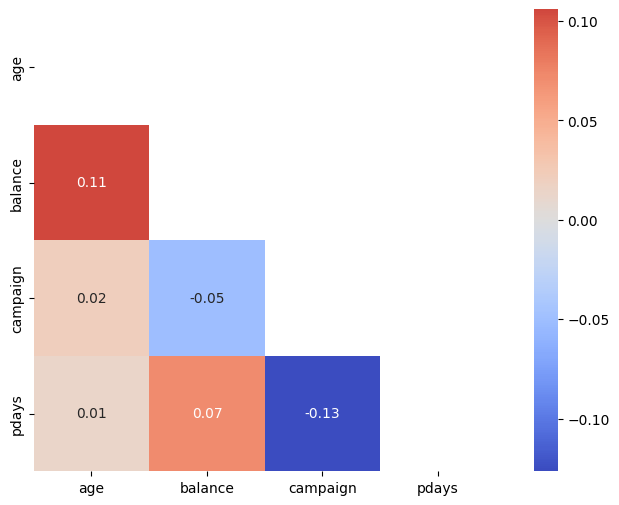

In [91]:
plt.figure(figsize=(10,6))

matrix = np.triu(df[numerical_features].corr(method='spearman'))

sns.heatmap(data=df[numerical_features].corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

Dari heatmap korelasi diatas, kita bisa menarik kesimpulan bahwa antar kolom numerikal mempunyai korelasi yang lemah bahkan ada yang tidak berkorelasi

## **Data Preprocessing**

### **Drop Duplicates**

In [20]:
df.shape

(7805, 11)

In [21]:
df.duplicated().sum()

0

In [22]:
df = df.drop_duplicates().reset_index(drop=True)

In [23]:
df.shape

(7805, 11)

### **Change Value**

In [24]:
# mengganti value pada kolom job yaitu admin. menjadi admin
df['job'] = df['job'].replace('admin.', 'admin')

### **Handling Outliers**

In [25]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7800,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7801,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7802,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0
7803,31,admin,54,yes,no,cellular,nov,1,-1,unknown,0


In [26]:
numerical_features = df.drop(columns=['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']).describe().columns
numerical_features

Index(['age', 'balance', 'campaign', 'pdays'], dtype='object')

In [27]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,age,6.5,74.5,0,7684,121,1.55
1,balance,-2207.5,4020.5,3,7069,733,9.43
2,campaign,-2.0,6.0,0,7376,429,5.50
3,pdays,-64.0,104.0,0,6373,1432,18.35


In [28]:
# proporsi target pada dataset awal
df['deposit'].value_counts()/len(df) * 100

deposit
0    52.210122
1    47.789878
Name: count, dtype: float64

In [29]:
# proporsi target untuk data outlier pada kolom age
df[df['age']>74.5]['deposit'].value_counts()/len(df[df['age']>74.5]) * 100

deposit
1    77.68595
0    22.31405
Name: count, dtype: float64

In [30]:
# proporsi target untuk data outlier pada kolom balace
df[(df['balance']>4020.5) | (df['balance']<-2207.5)]['deposit'].value_counts()/len(df[(df['balance']>4020.5) | (df['balance']<-2207.5)]) * 100

deposit
1    58.559783
0    41.440217
Name: count, dtype: float64

In [31]:
# proporsi target untuk data outlier pada kolom campaign
df[df['campaign']>5]['deposit'].value_counts()/len(df[df['campaign']>5]) * 100

deposit
0    71.2
1    28.8
Name: count, dtype: float64

In [32]:
# proporsi target untuk data outlier pada kolom pdays
df[df['pdays']>104]['deposit'].value_counts()/len(df[df['pdays']>104]) * 100

deposit
1    62.430168
0    37.569832
Name: count, dtype: float64

Kita dapati bahwa data-data outlier tersebut memiliki proporsi 0 dan 1 pada kolom 'deposit' yang berbeda dibandingkan seluruh data. Oleh karenanya kita tidak akan hilangkan outlier tersebut karena data outlier tersebut memiliki informasi yang berpengaruh terhadap target.

### **Remove value 'unknown' & 'others'**

Sebelumnya, telah dilakukan beberapa percobaan dengan membiarkan dataset masih menyimpan nilai 'unknown' dan 'others'. Hasil dari pemodelannya menghasilkan nilai f1_score yang lebih kecil. Di bawah ini adalah hasil percobaan dengan mengambil 4 model terbaik:

**Percobaan 1 (Data masih mengandung nilai unknown dan others)** 
| Model | Benchmark Score | Tuning Score |
| --- | --- | --- |
| Random Forest | 0,674 | 0,677 |
| Gradient Boost | 0,673 | 0,675 |
| Ada Boost | 0,662 | 0,672 |
| XG Boost | 0,658 | 0,673 |

**Percobaan 2 (menghapus kolom poutcome yang mempunyai proporsi nilai unknown dan others mencapai 74%)** 
| Model | Benchmark Score | Tuning Score |
| --- | --- | --- |
| Gradient Boost | 0,677 | 0,678 |
| Ada Boost | 0,672 | 0,672 |
| Random Forest | 0,670 | 0,675 |
| XG Boost | 0,659 | 0,673 |

**Percobaan 3 (menghapus semua data yang mengandung nilai unknown dan others)** 
| Model | Benchmark Score | Tuning Score |
| --- | --- | --- |
| Gradient Boost | 0,703 | 0,705 |
| Random Forest | 0,702 | 0,712 |
| Ada Boost | 0,698 | 0,709 |
| XG Boost | 0,691 | 0,713 |

**Percobaan 4 (Mengganti data yang mengandung nilai unknown dan others menjadi np.nan (missing value) dan diisi dengan imputer)** 
| Model | Benchmark Score | Tuning Score |
| --- | --- | --- |
| Random Forest | 0,648 | 0,646 |
| Gradient Boost | 0,646 | 0,648 |
| XG Boost | 0,639 | 0,649 |
| Ada Boost | 0,632 | 0,641 |

- Dari 4x percobaan yang telah dilakukan, f1_score mengalami peningkatan ketika semua data yang mengandung nilai unknown dan others dihapus. Kedepannya, kita akan menghapus semua data yang mengandung nilai unknown dan others.

In [33]:
# baris yang memuat nilai 'unknown' pada kolom job
df[df['job']=='unknown'].index

Index([ 103,  110,  332,  902,  981, 1039, 1073, 1079, 1142, 1230, 1543, 1844,
       2220, 2223, 2251, 2272, 2372, 2436, 3086, 3185, 3361, 3505, 3532, 3733,
       3920, 4147, 4220, 4415, 4476, 4605, 4741, 5004, 5032, 5068, 5167, 5344,
       5742, 5802, 5984, 6058, 6194, 6315, 6438, 6456, 6489, 6765, 6838, 6976,
       7002, 7093, 7195, 7316, 7487, 7802],
      dtype='int64')

In [34]:
# menghapus nilai 'unknown' pada setiap baris pada kolom job
df = df.drop(index=[103,  110,  332,  902,  981, 1039, 1073, 1079, 1142, 1230, 1543, 1844,
       2220, 2223, 2251, 2272, 2372, 2436, 3086, 3185, 3361, 3505, 3532, 3733,
       3920, 4147, 4220, 4415, 4476, 4605, 4741, 5004, 5032, 5068, 5167, 5344,
       5742, 5802, 5984, 6058, 6194, 6315, 6438, 6456, 6489, 6765, 6838, 6976,
       7002, 7093, 7195, 7316, 7487, 7802], axis=0)

In [35]:
df.shape

(7751, 11)

In [36]:
# baris yang memuat nilai 'unknown' pada kolom contact
list(df[df['contact']=='unknown'].index)

[9,
 16,
 29,
 33,
 34,
 35,
 39,
 58,
 60,
 65,
 76,
 78,
 81,
 88,
 89,
 93,
 105,
 113,
 116,
 120,
 126,
 128,
 137,
 145,
 146,
 151,
 153,
 162,
 167,
 174,
 186,
 196,
 199,
 201,
 206,
 217,
 221,
 227,
 229,
 230,
 231,
 239,
 240,
 246,
 249,
 255,
 258,
 262,
 267,
 273,
 274,
 276,
 286,
 287,
 288,
 291,
 293,
 294,
 295,
 297,
 302,
 304,
 308,
 311,
 318,
 328,
 330,
 331,
 334,
 343,
 346,
 353,
 364,
 372,
 374,
 377,
 386,
 390,
 399,
 423,
 424,
 425,
 429,
 442,
 450,
 453,
 457,
 460,
 464,
 476,
 477,
 480,
 485,
 495,
 496,
 501,
 506,
 517,
 527,
 539,
 540,
 541,
 548,
 556,
 563,
 565,
 567,
 570,
 581,
 590,
 601,
 617,
 618,
 625,
 630,
 647,
 665,
 666,
 667,
 668,
 683,
 684,
 685,
 687,
 689,
 700,
 701,
 704,
 705,
 714,
 718,
 721,
 722,
 725,
 727,
 730,
 738,
 739,
 746,
 747,
 750,
 751,
 757,
 762,
 765,
 767,
 772,
 782,
 790,
 795,
 797,
 801,
 804,
 807,
 812,
 828,
 835,
 839,
 840,
 851,
 858,
 860,
 871,
 879,
 881,
 883,
 896,
 898,
 904,
 90

In [37]:
# menghapus nilai 'unknown' pada setiap baris pada kolom contact
df = df.drop(index=list(df[df['contact']=='unknown'].index))

In [38]:
df.shape

(6123, 11)

In [39]:
# proporsi value 'unknown' dan 'other' pada kolom poutcome
len(df[(df['poutcome']=='unknown') | (df['poutcome']=='other')])/len(df)

0.7411399640699003

In [40]:
df['poutcome'].value_counts()

poutcome
unknown    4159
failure     836
success     749
other       379
Name: count, dtype: int64

In [41]:
df = df.drop(columns='poutcome')

Karena proporsi value 'unknown' dan 'other' pada kolom `poutcome` mencapai 74%, kita akan mencoba untuk tidak menggunakan kolom ini untuk membuat model machine learning


### **Encoding**

In [42]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,1
2,51,admin,3025,no,no,cellular,may,1,352,1
3,38,services,-87,yes,no,cellular,may,1,-1,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,0


In [43]:
categorical_features = df.describe(include='object').columns
categorical_features

Index(['job', 'housing', 'loan', 'contact', 'month'], dtype='object')

In [44]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,job,11,"[admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed]"
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,2,"[cellular, telephone]"
4,month,12,"[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sep]"


Sekarang mari kita melakukan fitur encoding untuk fitur-fitur categorical yang kita miliki.
Yang akan kita lakukan adalah :


1. Merubah fitur/kolom `job` menggunakan Binary Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya cukup banyak.
2. Merubah fitur/kolom `housing` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `loan` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `contact` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `month` menggunakan Binary Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya cukup banyak.

In [45]:
# encoder
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'), ['housing', 'loan', 'contact']),
    ('binary', BinaryEncoder(), ['job', 'month'] )
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['housing', 'loan', 'contact']),
                                ('binary', BinaryEncoder(), ['job', 'month'])])

### **Scaling**

Kita akan menggunakan Robust Scaler karena data kita memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier.

In [46]:
# scaling features 
robust = RobustScaler()

## **Define Features (X) and Target (y)**

In [47]:
# Features
X = df.drop(columns=['deposit'])

# Target
y = df['deposit']

## **Data Splitting**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

## **Model Benchmark** 

In [49]:
# Define the models

# Logistic Regression
logreg = LogisticRegression(solver='liblinear')

# KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=5, random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

In [50]:
# Pilihan model
models = [logreg, knn, tree, rf, adaboost, gradboost, xgboost]

list_mean = []
list_std = []
list_all_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    # Pipeline berisi 3 tahap, untuk diisi di pada estimator di cross val
    pipe_model = Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('model', algoritma)
    ])

    # cross validation
    skfold = StratifiedKFold(n_splits = 5)
    
    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,    
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        error_score='raise'  
        
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_all_score.append(model_cv.round(4))

In [51]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],
    'mean': list_mean,
    'std': list_std,
    'all_score' : list_all_score
}).sort_values('mean', ascending=False)

,model,mean,std,all_score
5,Gradient Boost,0.702930,0.010119,"[0.6945, 0.6972, 0.7026, 0.7225, 0.6979]"
3,Random Forest,0.702075,0.012089,"[0.7114, 0.6861, 0.7057, 0.7172, 0.69]"
4,Ada Boost,0.698515,0.009629,"[0.6983, 0.6895, 0.7018, 0.7148, 0.6883]"
6,XGBoost,0.690889,0.010952,"[0.6965, 0.6771, 0.6886, 0.7087, 0.6835]"
0,Logistic Regression,0.688831,0.016385,"[0.6781, 0.6851, 0.7022, 0.7121, 0.6667]"
1,KNN,0.676780,0.004909,"[0.6822, 0.6742, 0.6692, 0.6819, 0.6763]"
2,Decision Tree,0.642046,0.018290,"[0.6489, 0.6523, 0.633, 0.6646, 0.6115]"


### **Interpretasi**

- Dari kelima model yang dicoba, ternyata model Gradient Boost menghasilkan rata-rata f1-score yang paling besar.
- Dari segi kestabilan, Ada Boost memiliki nilai yang relatif lebih stabil.
- Mari kita coba cek performa empat model dengan f1_score tertinggi

## **Predict Benchmark Model to Test Set**

In [52]:
list_f1_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred)
    list_f1_score.append(score)

In [53]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost'],
    'f1_score (test_set)': list_f1_score,
}).sort_values('f1_score (test_set)', ascending=False)

,model,f1_score (test_set)
6,XGBoost,0.713442
3,Random Forest,0.712246
4,Ada Boost,0.709772
5,Gradient Boost,0.705350
0,Logistic Regression,0.691187
1,KNN,0.685976
2,Decision Tree,0.641844


Berdasarkan hasil prediksi pada test set, terlihat bahwa Random Forest dan XG Boost memiliki performa akhir yang lebih baik pada dataset ini.

## **Hyperparameter Tuning**

**Ada Boost**

In [54]:
# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME', 'SAMME.R']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm

}

# Benchmark model
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('model', adaboost)
    ])

# Hyperparameter tuning
random_adaboost = RandomizedSearchCV(
    estimator=estimator_adaboost, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1, 
    random_state=0,
    n_iter=200
)

In [55]:
# fitting 
random_adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              AdaBoostClassifier(ra...
                                                                 0.08, 0.09,
                                                                 0.09999999999999999,
                                                                 0.11, 0.12,
                                                                 0.13, 0.14,
                                                                 0.15000000000000002,
                                                                 0.16, 0.17,
                                                                 0.18000000000000002,
                                                                 0.19, 0.2,
                                                                 0.21000000000000002,
                                                                 0.22, 0.23,
                                                                 0.24000000000000002,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29000000000000004,
                                                                 0.3, ...],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...]},
                   random_state=0, scoring='f1')

In [56]:
# score f1 terbaik
random_adaboost.best_score_

0.7088877915064613

**Gradient Boost**

In [57]:
# kedalaman pohon
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2,1,0.1))

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,10))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

# Benchmark model
gradboost = GradientBoostingClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_gradboost = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('model', gradboost)
    ])

# Hyperparameter tuning
random_gradboost = RandomizedSearchCV(
    estimator=estimator_gradboost, 
    param_distributions = hyperparam_space_gradboost, 
    cv = skf, 
    scoring = 'f1', 
    n_jobs = -1, 
    random_state=0,
    n_iter=200
)

In [58]:
# fitting 
random_gradboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              GradientBoostingClass...
                                                             7, 8, 9],
                                        'model__max_features': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001]},
                   random_state=0, scoring='f1')

In [59]:
# score f1 terbaik
random_gradboost.best_score_

0.7112275810539697

**Random Forest**

In [60]:
hyperparam_space={
    'model__n_estimators' : range(100,1000,50),
    'model__max_depth' : range(2,10,1),
    'model__min_samples_split' : range(2,50,1),
    'model__min_samples_leaf' : range(2,50,1),
    'model__max_features' : range(3,7,1)
}

# Pipeline
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('model', rf)                
])

random_search = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_iter = 200,
    n_jobs=-1,
    random_state=0
)

In [61]:
# fitting
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__max_depth': range(2, 10),
                                        'model__max_features': range(3, 7),
                                        'model__min_samples_leaf': range(2, 50),
                                        'model__min_samples_split': range(2, 50),
                                        'model__n_estimators': range(100, 1000, 50)},
                   random_state=0, scoring='f1')

In [62]:
# f1_score terbaik
random_search.best_score_

0.7155968579328515

In [63]:
random_search.best_params_

{'model__n_estimators': 150,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 26,
 'model__max_features': 3,
 'model__max_depth': 2}

**XGBoost**

In [64]:
# kedalaman pohon
max_depth = list(np.arange(1,11))

# learning rate
learning_rate = list(np.arange(0.01, 1.0, 0.01))

# jumlah pohon
n_estimators = list(np.arange(100,201))

# jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2, 1.0, 0.1))

# gamma (min_impurity_decrease)
gamma = list(np.arange(1,11))

# jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))

# alpha (regularization)
reg_alpha = list(np.logspace(-3,3,7))


# Hyperparam space XGboost
hyperparam_space_xgboost = {
    
    'model__max_depth':max_depth, 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [65]:
# Benchmark model 
xgboost = XGBClassifier(random_state=0, verbosity=0)

# Create the algorithm chains
estimator_xgboost = Pipeline([
        ('transformer', transformer),
        ('model', xgboost)
        ])

# Hyperparameter tuning
random_xgboost = RandomizedSearchCV(
    estimator_xgboost, 
    param_distributions = hyperparam_space_xgboost, 
    cv = skfold, 
    scoring = 'f1', 
    n_jobs = -1,  
    random_state=0,
    n_iter=200 
)

In [66]:
# fitting 
random_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month'])])),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            cal...
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001, 0.01, 0.1,
                                                             1.0, 10.0, 100.0,
                                                             1000.0],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001]},
                   random_state=0, scoring='f1')

In [67]:
# score f1 terbaik
random_xgboost.best_score_

0.7225353455855357

## **Predict Tuned Model to Test Set**

In [68]:
model_tuned = [random_adaboost.best_estimator_, random_gradboost.best_estimator_, random_search.best_estimator_, random_xgboost.best_estimator_]

In [69]:
list_f1_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in model_tuned :

    # fitting
    algoritma.fit(X_train, y_train)

    # predict
    y_pred = algoritma.predict(X_test)

    # evaluate
    score = f1_score(y_test, y_pred)
    list_f1_score.append(score)

In [70]:
# Perbandingan performa antar model
pd.DataFrame({
    'model_tuned':['Ada Boost', 'Gradient Boost', 'Random Forest', 'XG Boost'],
    'f1_score (test_set)': list_f1_score,
}).sort_values('f1_score (test_set)', ascending=False)

,model_tuned,f1_score (test_set)
1,Gradient Boost,0.721794
2,Random Forest,0.720051
3,XG Boost,0.718711
0,Ada Boost,0.712329


### **Summary**

| Model | f1_score (test_set) |
| --- | --- | 
| Gradient Boost (tuned) | 0.722 |
| Random Forest (tuned) | 0.720 |
| XG Boost (tuned) | 0.718 |
| XG Boost | 0.713 |
| Ada Boost (tuned) | 0.712 |
| Random Forest | 0.712 |
| Ada Boost | 0.709 |
| Gradient Boost | 0.705 

Model Gradient Boost yang telah di tuning memiliki f1_score terbaik sehingga kita akan menjadikan Gradient Boost sebagai final model

In [71]:
# menggunakan model terbaik hasil randomizedsearch
final_model = random_gradboost.best_estimator_

# fitting
final_model.fit(X_train, y_train)

# predict
y_pred = final_model.predict(X_test)

# evaluate (f1-score)
f1_score(y_test, y_pred)

0.7217939733707077

In [79]:
# Parameter terbaik dari final model
random_gradboost.best_params_

{'model__subsample': 0.6000000000000001,
 'model__n_estimators': 70,
 'model__max_features': 6,
 'model__max_depth': 3,
 'model__learning_rate': 0.02}

## **Model Properties**

**Feature Importances**

In [72]:
final_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('scaler', RobustScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.02, max_features=6,
                                            n_estimators=70, random_state=0,
                                            subsample=0.6000000000000001))])

In [73]:
onehot_features = list(final_model['preprocess'].transformers_[0][1].get_feature_names_out())
binary_features = list(final_model['preprocess'].transformers_[1][1].get_feature_names_out())
remainder_features = list(X.columns[final_model['preprocess'].transformers_[2][2]])

feature_names = onehot_features + binary_features + remainder_features


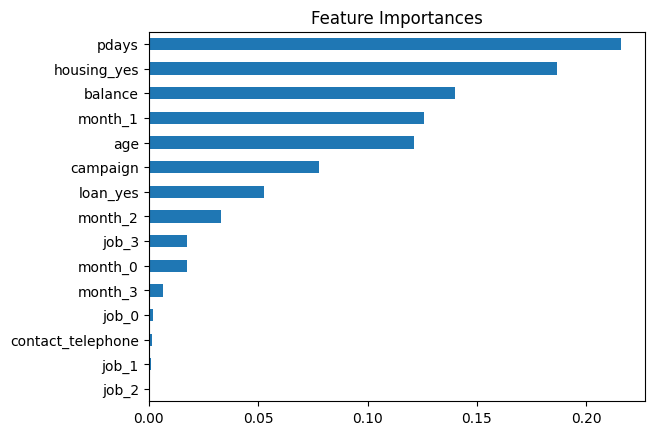

In [74]:
coef1 = pd.Series(final_model['model'].feature_importances_, feature_names).sort_values()
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

- Feature paling penting dalam model kita adalah `pdays` yaitu jumlah hari yang berlalu setelah nasabah terakhir kali dihubungi diikuti oleh `housing_yes` yaitu fitur yang berisi data kepemilikan pinjaman rumah, `balance` yaitu fitur yang berisi saldo nasabah, `age` atau usia nasabah, `campaign` yaitu fitur yang menunjukan berapa kali kontak yang dilakukan terhadap nasabah, dan seterusnya.

# **Conclusion**

- Model klasifikasi terbaik untuk memprediksi nasabah yang term deposit atau tidak pada dataset ini adalah Gradient Boost dengan metriks f1_score sebesar 0.72

- Parameter terbaik untuk final model yang dipilih adalah :
    - n_estimator : 0.60
    - max_features : 6
    - max_depth : 3
    - learning_rate : 0.02
    <br><br>

- Model ini bisa menghemat biaya telfon sebesar $11,208 pertahun

- Berdasarkan hasil analisis, nasabah yang cenderung melakukan term deposit adalah nasabah yang bekerja sebagai management, nasabah yang tidak mempunyai pinjaman perumahan atau pinjaman pribadi, dan nasabah yang dihubungi melalui seluler.

### **Confusion Matrix**

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       556
           1       0.68      0.77      0.72       669

    accuracy                           0.68      1225
   macro avg       0.67      0.67      0.67      1225
weighted avg       0.68      0.68      0.67      1225



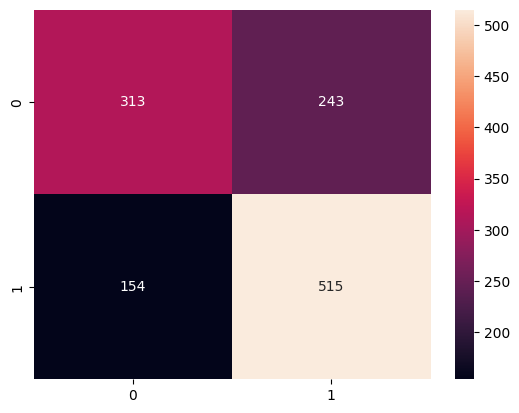

In [76]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah calon nasabah yang aktualnya term deposit dan diprediksi akan term deposit (True Positive) : 515 orang
- Jumlah calon nasabah yang aktualnya term deposit tetapi diprediksi tidak akan term deposit (False Negative) : 154 orang
- Jumlah calon nasabah yang aktualnya tidak term deposit dan diprediksi tidak akan term deposit (True Negative) : 313 orang
- Jumlah calon nasabah yang aktualnya tidak term deposit tetapi diprediksi akan term deposit (False Positive) : 243 orang
- False Positive Rate (aktualnya tidak term deposit, diprediksi term deposit) = 43.7%
- False Negative Rate (aktualnya term deposit, diprediksi tidak term deposit) = 76.9%

---

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi calon nasabah yang akan term deposit atau tidak. Dampaknya adalah kita cenderung untuk melakukan kampanye dengan menelepon ke seluruh calon nasabah.

Jumlah calon nasabah untuk dasar perhitungan :
- calon nasabah yang kita tawarkan term deposit = 1225 orang
- calon nasabah yang aktualnya term deposit = 669 orang

Cost Estimation
Kita asumsikan setiap nasabah ditelfon sebanyak 6 kali dengan biaya $4 untuk setiap panggilan
- total panggilan x biaya telfon
- = (Jumlah nasabah yang kita tawarkan term deposit x biaya perpanggilan)
- = 1225 x 24 = $29.400

Profit estimation
- Pendapatan - Biaya
- = (Jumlah calon nasabah yang term deposit x Profit dari term deposit) - ( Jumlah calon nasabah yang term deposit x Biaya penggantian) 
- = (669 x $47,5) - (1225 x $24) = $31,777.5 - $29,400 = $2,377.5

Maka keuntungannya sekitar **$2,377.5**

---
Saat kita menggunakan machine learning, kita hanya menawarkan produk ke calon nasabah yang diprediksi akan term deposit saja.

Jumlah Nasabah untuk dasar perhitungan :
- Calon nasabah yang dihubungi adalah nasabah yang diprediksi term deposit = TP + FP = 515 + 243 = 647 orang
- Calon nasabah yang di prediksi dan actualnya term deposit = TP = 515

Profit Estimation
- Pendapatan - Biaya
- = (Calon nasabah yang di prediksi dan actualnya term deposit x Profit term deposit) - ( Jumlah calon nasabah yang diprediksi term deposit x Biaya penggantian) 
- = (515 x $47,5) - (758 x $24) = $24,462.5 - $18,192 = $6,270.5
Maka keuntungannya sekitar **$6,270.5**

---
Peningkatan Profit = $6,270.5 - $2,377.5 = $3,893

**Persentase kenaikan = (nilai akhir - nilai awal) / nilai awal x 100%** 
- = $3,893 / $2,377.5 x 100% = **1.64%**

Berdasarkan test set, model kita dapat meningkatkan keuntungan hingga **1.64%** dalam setahun.



### **Model Limitation**

| Fiture | Data Type | Limitation |
| --- | --- | --- |
| age | Integer | Nasabah dengan rentang usia 18-95 tahun |
| job | String | Semua nilai unik pada kolom job (11 pekerjaan), tidak termasuk nilai 'unknown' |
| balance | Integer | Nasabah dengan saldo -6847 sampai 66653 dollar |
| housing | String | Semua nasabah baik mempunyai pinjaman perumahan atau tidak |
| loan | String | Semua nasabah baik mempunyai pinjaman pribadi atau tidak |
| contact | String | Semua nilai unik pada kolom contact (cellular/telephone), tidak termasuk nilai 'unknown' |
| month | String | Semua bulan dalam 1 tahun  |
| campaign | Integer | Jumlah kontak yang dilakukan selama kampanye dengan rentang 1-43 kali |
| pdays | Integer | jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya dengan rentang -1 - 854 hari|
| poutcome | String | Fitur ini telah dihilangkan pada permodelan sehingga sudah tidak bisa digunakan untuk prediksi selanjutnya |

# **Recommendation**

- Menambahkan lebih banyak fitur yang kemungkinan bisa meningkatkan score model seperti status pernikahan, jumlah anggota keluarga, income, dan sebagainya.

- Menghindari pengisian data dengan nilai 'unknown' atau 'other' karena menyebabkan score model menjadi turun.
- Karena fitur poutcome mengandung nilai 'unknown' dan 'other' yang sangat banyak, fitur tersebut kita hilangkan pada pemodelan ini. Apabila fitur tersebut akan digunakan pada proses modeling selanjutnya, nilai harus diisi dengan 'Success' atau 'Failure' 
- Pada dataset, terlihat bahwa marketing campaign masih dilakukan secara tradisional yaitu melalui telemarketing. Seiring dengan perkembangan zaman, ada baiknya kita bisa mulai meningkatkan kegiatan marketing campaign kita melalui internet (digital marketing) supaya bisa menjangkau calon nasabah secara lebih luas dan lebih efisien.
- Kita bisa memberikan bunga yang lebih kompetitif dibandingkan kompetitor sehingga bisa menarik calon nasabah untuk melakukan term deposit di bank kita.